# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set the base url and the unit of temperature we need
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print("Beginning Data Retrieval")
print("-"*36)
# counter is the count for every city
# seter is the set for every 50 counts
counter = 0
seter = 1
# Create lists to store raw data from json
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
# looping through all the cities, and get the json
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    cities_response = requests.get(query_url)
    cities_json = cities_response.json()
    # while requesting the json successfully, print out the city and add the counter
    # otherwise, skipping the city and jump to the next
    if (cities_response.status_code == 200):
        print(f"Processing Record {counter} of Set {seter} | {city}")
        counter += 1
        # append datasets into the lists created above
        city_name.append(cities_json["name"])
        cloudiness.append(cities_json["clouds"]["all"])
        country.append(cities_json["sys"]["country"])
        date.append(cities_json["dt"])
        humidity.append(cities_json["main"]["humidity"])
        lat.append(cities_json["coord"]["lat"])
        lon.append(cities_json["coord"]["lon"])
        max_temp.append(cities_json["main"]["temp_max"])
        wind_speed.append(cities_json["wind"]["speed"])
    else:
        print("City not found. Skipping...")
    # while counter reach 50, counter needs to start from 0 and go to next set
    if (counter == 50):
        seter += 1
        counter = 0
print("-"*36)
print("Data Retrieval Complete")
print("-"*36)       

Beginning Data Retrieval
------------------------------------
Processing Record 0 of Set 1 | tuktoyaktuk
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | coahuayana
City not found. Skipping...
Processing Record 7 of Set 1 | moa
Processing Record 8 of Set 1 | oskaloosa
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | makakilo city
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | sandakan
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | kataysk
Processing Record 20 of Set 1 | ust-kuyga
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | gushikawa
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | gazanjyk
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | marzuq
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | kanniyakumari
City not found. Skipping...
Processing Record 46 of Set 4 | butajira
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | coolum beach
Processing Record 49 of Set 4 | quang ngai
Processing Record 0 of Set 5 | broome
Processing Record 1 of Set 5 | zlobin
Processing Record 2 of Set 5 | bowen
Processing Record 3 of Set 5 | lavumisa
Processing Record 4 of Set 5 | karaton
City not found. Skipping...
Processing Record 5 of Set 5 | taoudenni
Processing Record 6 of Set 5 | corpus christi
Processing Record 7 of Set 5 | khandbari
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | aksarka
Proce

Processing Record 28 of Set 8 | ibotirama
Processing Record 29 of Set 8 | grand gaube
Processing Record 30 of Set 8 | konstantinovka
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | moree
Processing Record 33 of Set 8 | elvas
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | paralimni
Processing Record 36 of Set 8 | guymon
Processing Record 37 of Set 8 | dhidhdhoo
Processing Record 38 of Set 8 | caucaia
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | sobolevo
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | colac
Processing Record 43 of Set 8 | kawalu
Processing Record 44 of Set 8 | nova prata
Processing Record 45 of Set 8 | buchanan
Processing Record 46 of Set 8 | pangkalanbuun
Processing Record 47 of Set 8 | puerto pailas
Processing Record 48 of Set 8 | pospelikha
Processing Record 49 of Set 8 | juba
Processing Record 0 of Set 9 | laytown
Processing Record 1 of Set 9 | simao
Processi

Processing Record 18 of Set 12 | kautokeino
Processing Record 19 of Set 12 | sterling
City not found. Skipping...
Processing Record 20 of Set 12 | jurm
Processing Record 21 of Set 12 | shelburne
City not found. Skipping...
Processing Record 22 of Set 12 | tilichiki
Processing Record 23 of Set 12 | puerto narino
Processing Record 24 of Set 12 | tres picos
Processing Record 25 of Set 12 | genhe
City not found. Skipping...
Processing Record 26 of Set 12 | del rio
Processing Record 27 of Set 12 | isangel
Processing Record 28 of Set 12 | terra rica
Processing Record 29 of Set 12 | cascais
Processing Record 30 of Set 12 | gairatganj
Processing Record 31 of Set 12 | meulaboh
Processing Record 32 of Set 12 | high level
Processing Record 33 of Set 12 | aykhal
Processing Record 34 of Set 12 | urambo
Processing Record 35 of Set 12 | san juan
Processing Record 36 of Set 12 | port hueneme
------------------------------------
Data Retrieval Complete
------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# put all datas into DataFrame
cities_weather = pd.DataFrame({
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})
# export the city data in to csv file
cities_weather.to_csv(output_data_file,index = None, header=True)

In [5]:
# display the count for each column
cities_weather.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [6]:
# display the first five rows in DataFrame
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,5,CA,1586382256,65,69.45,-133.04,8.60,12.75
1,Hithadhoo,84,MV,1586382256,68,-0.60,73.08,84.83,10.27
2,Mataura,100,NZ,1586382256,88,-46.19,168.86,52.00,17.00
3,Grindavik,75,IS,1586382256,83,63.84,-22.43,33.80,2.24
4,Bredasdorp,30,ZA,1586382257,77,-34.53,20.04,60.01,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

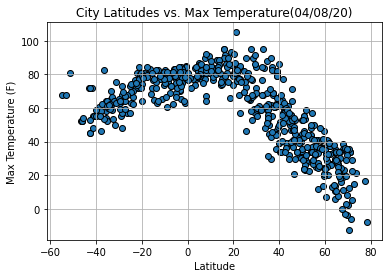

In [9]:
# Use the time we import to convert the timestamp on column "Data" to regular time
ts = time.gmtime(cities_weather["Date"][0])
# "%x" will display date in mm/dd/yy/ format
date = time.strftime("%x",ts)
# Scatter Plot
lat_temp = plt.scatter(cities_weather["Lat"],cities_weather["Max Temp"],marker="o",
                      edgecolor="black")
plt.title(f"City Latitudes vs. Max Temperature({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

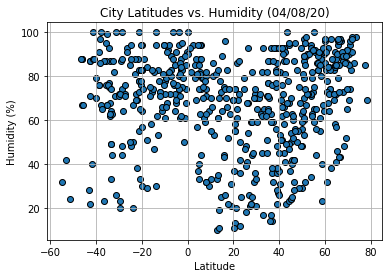

In [10]:
lat_humi = plt.scatter(cities_weather["Lat"],cities_weather["Humidity"],marker="o",
                      edgecolor="black")
plt.title(f"City Latitudes vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/lat_humi.png")
plt.show()

#### Latitude vs. Cloudiness Plot

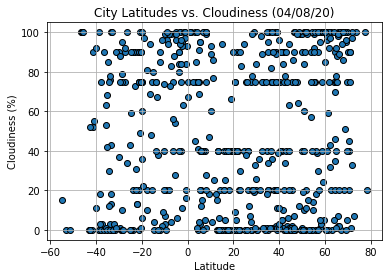

In [11]:
lat_cloud = plt.scatter(cities_weather["Lat"],cities_weather["Cloudiness"],marker="o",
                      edgecolor="black")
plt.title(f"City Latitudes vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

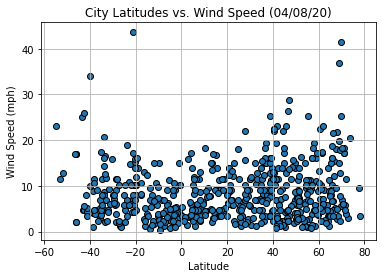

In [12]:
lat_wind = plt.scatter(cities_weather["Lat"],cities_weather["Wind Speed"],marker="o",
                      edgecolor="black")
plt.title(f"City Latitudes vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/lat_wind.png")
plt.show()

## Linear Regression

In [13]:
# Linear Regression plots Function
# Variables in the parentheses need to be define while calling the function
def linearRegreFcn(x_val,y_val,pts,title,xlab,ylab,name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,pts,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"../output_data/{name}.png")
    plt.show()

In [14]:
# Northern and Southern Hemisphere DataFrames
northern_df = cities_weather[cities_weather["Lat"] >= 0]
southern_df = cities_weather[cities_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8767670489143374


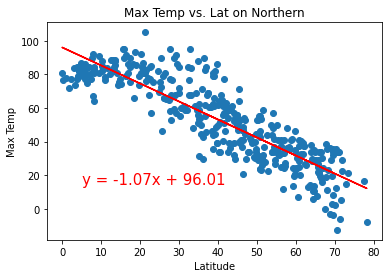

In [15]:
# Plot the Linear Regression by calling the function and define variables
title = "Max Temp vs. Lat on Northern"
xlab = "Latitude"
ylab = "Max Temp"
name = "lat_temp_north"
pts = (5,15)
linearRegreFcn(northern_df["Lat"],northern_df["Max Temp"],pts,title,xlab,ylab,name)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.669047073636087


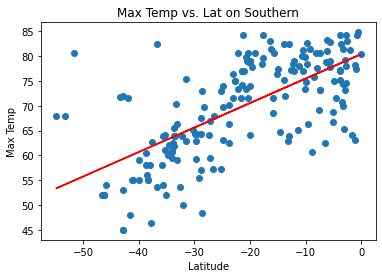

In [16]:
title = "Max Temp vs. Lat on Southern"
xlab = "Latitude"
ylab = "Max Temp"
pts = (-30,40)
name = "lat_temp_south"
linearRegreFcn(southern_df["Lat"],southern_df["Max Temp"],pts,title,xlab,ylab,name)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2667455468756179


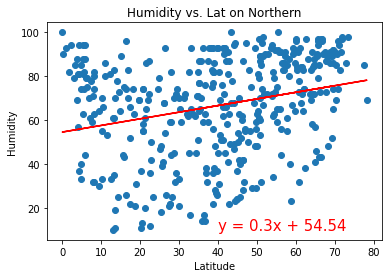

In [17]:
title = "Humidity vs. Lat on Northern"
xlab = "Latitude"
ylab = "Humidity"
pts = (40,10)
name = "lat_humi_north"
linearRegreFcn(northern_df["Lat"],northern_df["Humidity"],pts,title,xlab,ylab,name)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20036272882503128


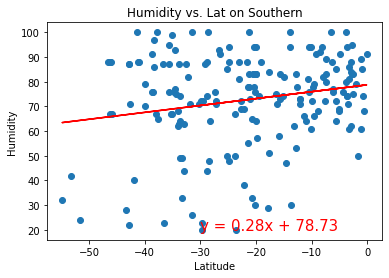

In [18]:
title = "Humidity vs. Lat on Southern"
xlab = "Latitude"
ylab = "Humidity"
pts = (-30,20)
name = "lat_humi_south"
linearRegreFcn(southern_df["Lat"],southern_df["Humidity"],pts,title,xlab,ylab,name)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16458958752374692


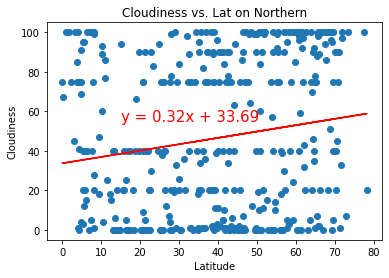

In [21]:
title = "Cloudiness vs. Lat on Northern"
xlab = "Latitude"
ylab = "Cloudiness"
pts = (15,55)
name = "lat_cloud_north"
linearRegreFcn(northern_df["Lat"],northern_df["Cloudiness"],pts,title,xlab,ylab,name)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26140089108717834


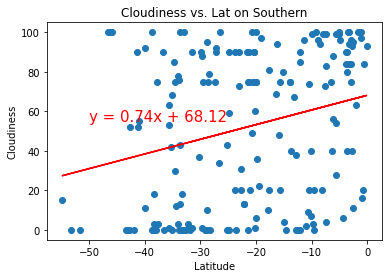

In [22]:
title = "Cloudiness vs. Lat on Southern"
xlab = "Latitude"
ylab = "Cloudiness"
pts = (-50,55)
name = "lat_cloud_south"
linearRegreFcn(southern_df["Lat"],southern_df["Cloudiness"],pts,title,xlab,ylab,name)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16758947441495955


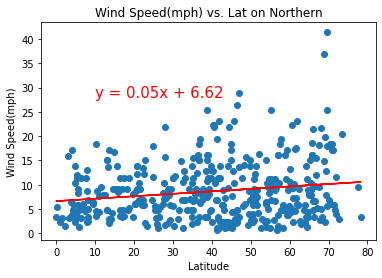

In [23]:
title = "Wind Speed(mph) vs. Lat on Northern"
xlab = "Latitude"
ylab = "Wind Speed(mph)"
pts = (10,28)
name = "lat_wind_north"
linearRegreFcn(northern_df["Lat"],northern_df["Wind Speed"],pts,title,xlab,ylab,name)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28287252634272814


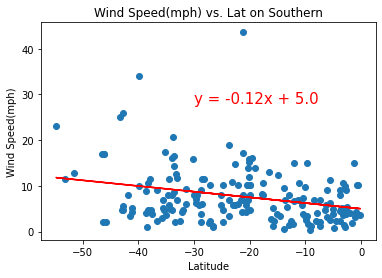

In [24]:
title = "Wind Speed(mph) vs. Lat on Southern"
xlab = "Latitude"
ylab = "Wind Speed(mph)"
pts = (-30,28)
name = "lat_wind_south"
linearRegreFcn(southern_df["Lat"],southern_df["Wind Speed"],pts,title,xlab,ylab,name)

# Conclusion

1. From the linear regression line between the tamperature and latitude, we can see that there is a strong negative relation with northern and temperature. Also, there is a strong positive relation with southern and temperature. This means the more close equator line, the warmer it is. And the futher to the equator line, the colder it place is. 

2. While we ploting the linear regression between cloudiness and latitude, we can see that r square is small, which means there is a weak or no relationship between this two sets of data.

3. Finally, there is a super weak or no relation between latitude and wind speed.